In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")

#%matplotlib inline

In [2]:
_METRICS_FILE = './files/benchmark_pool'
_METRIC = 'timeperinstance'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv_pooling'
_CLASSIFIER_1 = 'keras_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = [ 'keras_parallel_3_Dilated_Conv']

In [3]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBagAdwin', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_3_Dilated_Conv_pooling', 'keras_3_Dilated_Conv', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier'])]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]

metrics = metrics[metrics['instances']>1000]

metrics['instancesperseconds'] = metrics['instances']*metrics['attributes']/metrics['total_time']
metrics['timeperinstance'] = metrics['total_time']/metrics['instances']

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,instancesperseconds,timeperinstance
577,ElectricDevices,MOA_LeveragingBag,16637,96,7,0.577055,0.468425,0.009860,0.003342,0.013202,16.406712,5.560665,21.967376,7.270563e+04,0.001320
1019,InsectWingbeatSound,sklearn_SGDClassifier,2190,256,11,0.531005,0.464547,0.001042,0.000112,0.001154,0.228263,0.024454,0.252717,2.218452e+06,0.000115
2345,Yoga,MOA_HoeffdingOptionTree,3300,426,2,0.552568,0.125778,0.000727,0.000258,0.000985,0.239898,0.085065,0.324963,4.326026e+06,0.000098
1927,Symbols,MOA_LeveragingBag,1020,398,6,0.910592,0.887084,0.048928,0.017297,0.066226,4.990684,1.764342,6.755027,6.009747e+04,0.006623
1160,Mallat,MOA_SingleClassifierDrift,2400,1024,8,0.944707,0.931191,0.004779,0.004545,0.009324,1.146913,1.090817,2.237730,1.098256e+06,0.000932
2364,Yoga,keras_parallel_3_Dilated_Conv_pooling,3290,426,2,0.907326,0.796041,0.033654,0.014674,0.048328,11.072324,4.827742,11.072324,1.265805e+05,0.003365
1764,ShapesAll,keras_parallel_3_Dilated_Conv_pooling,1190,512,60,0.595484,0.567582,0.028714,0.018585,0.047300,3.416993,2.211669,3.416993,1.783088e+05,0.002871
239,ChlorineConcentration,sklearn_SGDClassifier,4297,166,3,0.494261,0.099131,0.000420,0.000079,0.000499,0.180692,0.033798,0.214489,3.325584e+06,0.000050
2369,Yoga,sklearn_SGDClassifier,3290,426,2,0.518336,0.042326,0.000470,0.000255,0.000725,0.154686,0.083851,0.238537,5.875565e+06,0.000073
1146,Mallat,MOA_HoeffdingTree,2400,1024,8,0.944707,0.931191,0.005903,0.004869,0.010772,1.416828,1.168553,2.585380,9.505758e+05,0.001077


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
#metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
limits = (min(metrics_table.min().min(), -0.0), max(metrics_table.max().max()+0.05, 1.1))
print(limits)

metrics_table

(-0.0, 1.1)


classifier,MOA_ASHoeffdingTree,MOA_HoeffdingOptionTree,MOA_HoeffdingTree,MOA_LeveragingBag,MOA_OzaBagAdwin,MOA_OzaBoostAdwin,MOA_SingleClassifierDrift,keras_3_Dilated_Conv,keras_parallel_3_Dilated_Conv_pooling,sklearn_MLPClassifier,sklearn_SGDClassifier
dataset,,,,,,,,,,,
NonInvasiveFetalECGThorax1,0.004852,0.005036,0.004799,0.080896,0.067780,0.059052,0.003972,0.143760,0.003764,0.000596,0.000820
ShapesAll,0.004826,0.004466,0.004358,0.086712,0.063073,0.058505,0.004223,0.089670,0.002871,0.000383,0.000741
NonInvasiveFetalECGThorax2,0.004760,0.004925,0.004778,0.085372,0.070695,0.059077,0.004571,0.143761,0.004143,0.000551,0.000740
Phoneme,0.003098,0.003132,0.003136,0.052109,0.022325,0.020749,0.005937,0.185254,0.004023,0.000581,0.000753
Mallat,0.001068,0.001116,0.001077,0.019527,0.014532,0.011152,0.000932,0.187417,0.003907,0.000629,0.000235
HandOutlines,0.000882,0.000855,0.000773,0.015734,0.010285,0.012670,0.000641,0.453426,0.005804,0.001480,0.000254
CinCECGtorso,0.000851,0.000845,0.000858,0.015543,0.010962,0.007299,0.000700,0.279275,0.004099,0.000867,0.000242
InsectWingbeatSound,0.000339,0.000346,0.000318,0.005909,0.004266,0.003988,0.000293,0.052328,0.002543,0.000130,0.000115
Symbols,0.000315,0.000312,0.000294,0.006623,0.004720,0.003278,0.000246,0.068761,0.002910,0.000406,0.000172


In [5]:
#metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
list(metrics_table.columns)
metrics_table.mean()

classifier
MOA_ASHoeffdingTree                      0.000834
MOA_HoeffdingOptionTree                  0.000841
MOA_HoeffdingTree                        0.000811
MOA_LeveragingBag                        0.014936
MOA_OzaBagAdwin                          0.010689
MOA_OzaBoostAdwin                        0.009387
MOA_SingleClassifierDrift                0.000850
keras_3_Dilated_Conv                     0.087320
keras_parallel_3_Dilated_Conv_pooling    0.003193
sklearn_MLPClassifier                    0.000349
sklearn_SGDClassifier                    0.000204
dtype: float64

In [6]:
classifiers = list(metrics_table.columns)
classifier_labels = [n.replace('_',' - ') if 'keras' not in n else 'keras - CNN' for n in classifiers]
classifier_labels = "AS Hoeffding tree, Hoeffding option tree, Hoeffding tree, Leveraging bag, Oza Bag Adwin, Oza Boost Adwin, Single classifier drift, keras non-parallel CNN, keras parallel CNN, MLP, SGD".split(", ") 

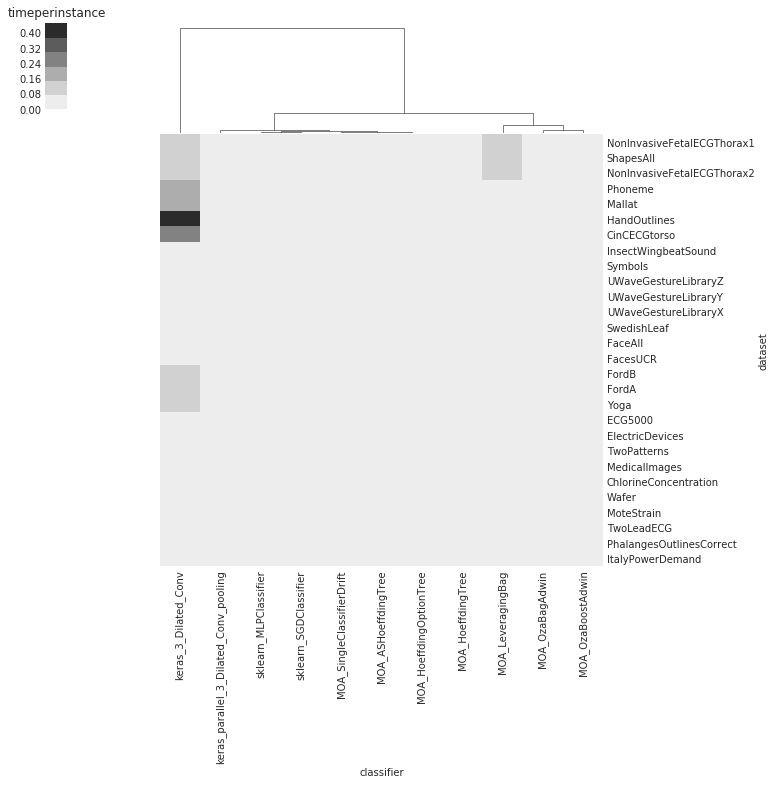

In [7]:
#sns.color_palette("BuGn")
#sns.cm.rocket_r
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
with plt.style.context('seaborn-whitegrid'):
    cm = sns.clustermap(metrics_table, figsize=(10,10), cmap=sns.color_palette("Greys"), annot=False, linewidth=0.0, row_cluster=False)
    cm.cax.yaxis.tick_left()
    cm.cax.yaxis.set_label_position("left")
    #cm.cax.set_visible(False)
    cm.cax.set_title(_METRIC)

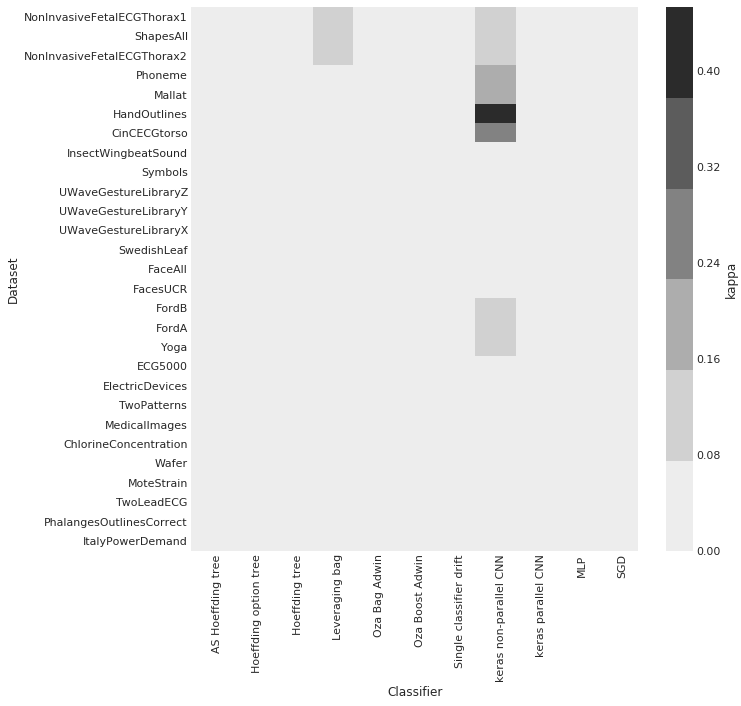

In [8]:
sns.set(font_scale=1.0)
with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(metrics_table, cmap=sns.color_palette("Greys"), annot=False, linewidth=0.0, ax=ax, cbar_kws={'label': 'kappa'})
    ax.set_xticklabels(classifier_labels, rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel("Classifier")
    ax.set_ylabel("Dataset")
#plt.savefig("files/plots/heatmap.png")
    

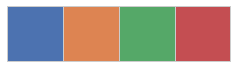

In [9]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


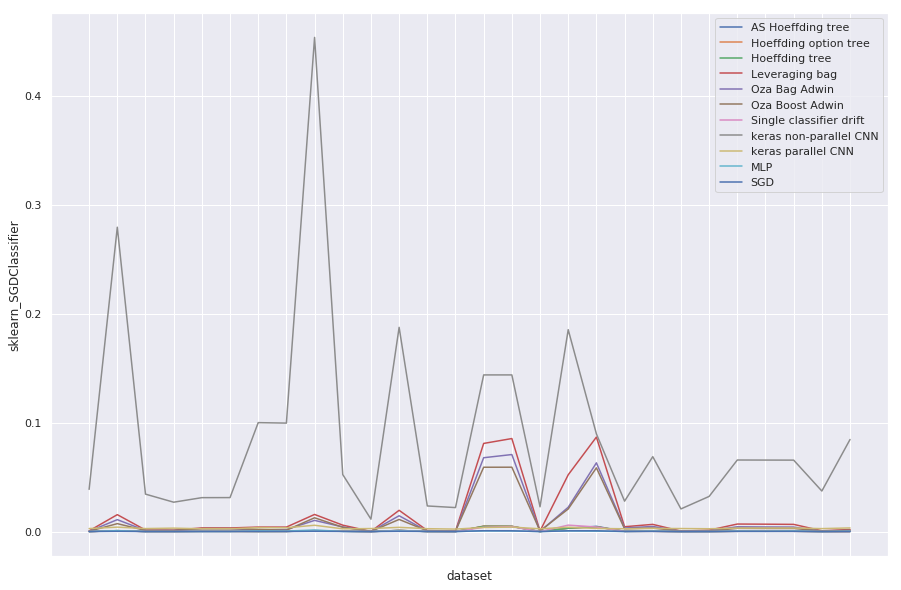

In [10]:
fig,ax = plt.subplots(1, figsize=(15,10))
for i,clf_ in enumerate(metrics_table.columns):
    sns.lineplot(data=metrics_table, y=clf_, x=metrics_table.index, label=classifier_labels[i], ax=ax)
    ax.set_xticklabels([])

/home/pedrolarben/anaconda3/envs/tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


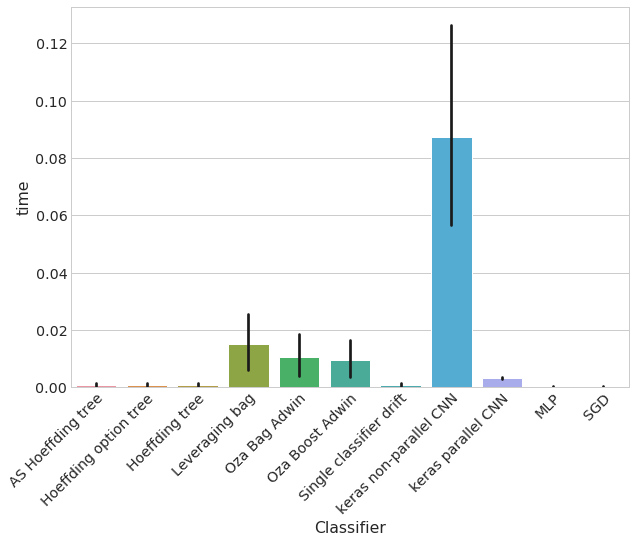

In [11]:
sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('time')
    ax.set_xticklabels(classifier_labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')

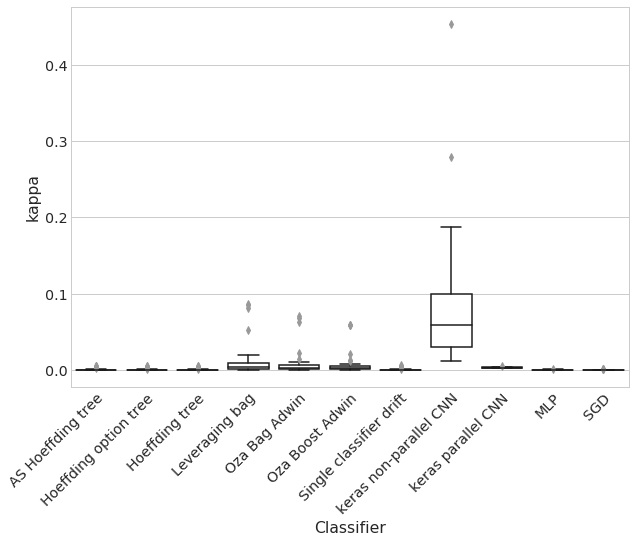

In [12]:
sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white')
    ax.set_ylabel('kappa')
    ax.set_xticklabels(classifier_labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')

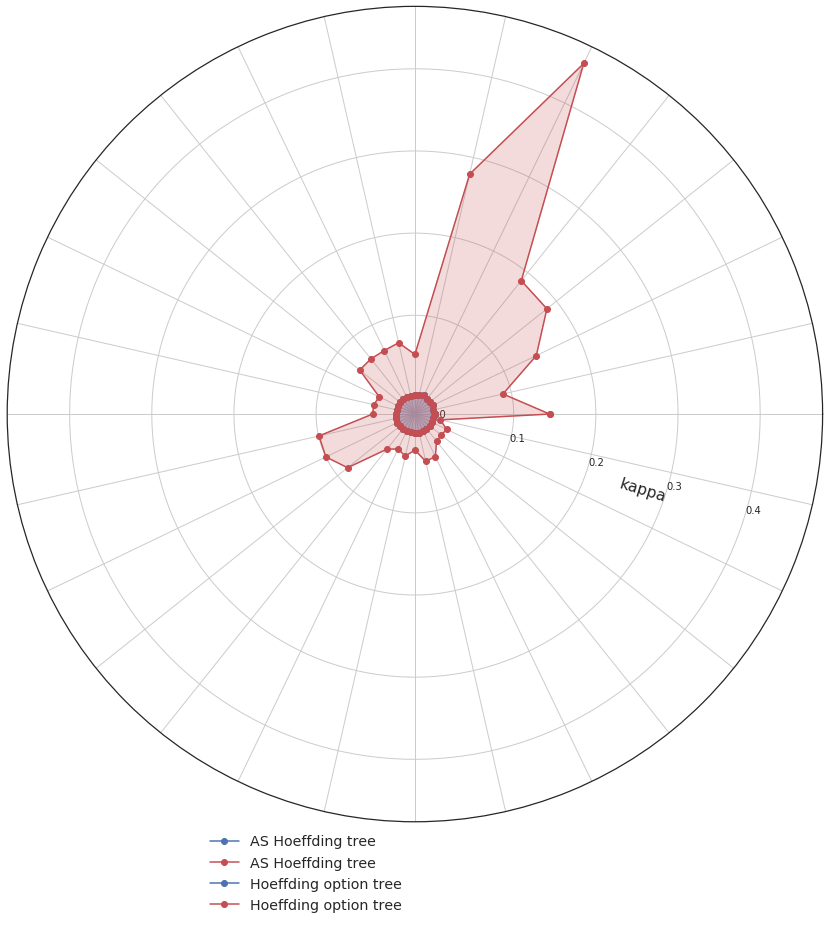

In [14]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--']

cnn = _CLASSIFIER
stats_cnn = metrics_table[cnn].values
stats_cnn = np.concatenate((stats_cnn,[stats_cnn[0]]))


sns.set(font_scale=1.3)
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(ncols=1, nrows=1, subplot_kw=dict(polar=True), figsize=(15,15))
    # close the plot
    for e,clf in enumerate([n for n in metrics_table.columns if 'keras' in n]):
        stats=metrics_table[clf].values
        stats=np.concatenate((stats,[stats[0]]))
        ax.plot(angles, stats_cnn, 'o-', label=classifier_labels[e], color=pal[True])
        ax.fill(angles, stats_cnn, alpha=0.2,color=pal[True])
        ax.plot(angles, stats, 'o-', label=classifier_labels[e], color=pal[False])
        ax.fill(angles, stats, alpha=0.2, color=pal[False])


    ax.set_thetagrids(angles * 180/np.pi, ['' if i%2==1 else '' for i in range(len(datasets))])

    ax.set_yticklabels(["{0:.1f}".format(t) for i,t in enumerate(list(ax.get_yticks()))], 
                                 fontsize=10)
    ax.set_rlabel_position(-17)
    label_position=ax.get_rlabel_position()
    ax.text(np.radians(label_position),ax.get_rmax()/2.,'kappa',
            rotation=label_position,ha='left',va='top')

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.))    
    #ax.set_title("kappa")
    #ax.grid(True)

